In [1]:
%-Welcome
spm('asciiwelcome');
[vspm,rspm] = spm('Ver');
tlkt = ver(spm_check_version);
fprintf('%s, version %s\n',vspm,rspm);
fprintf('%s, version %s\n',tlkt.Name,version);

 ___  ____  __  __                                            
/ __)(  _ \(  \/  )                                           
\__ \ )___/ )    (   Statistical Parametric Mapping           
(___/(__)  (_/\/\_)  SPM12 - https://www.fil.ion.ucl.ac.uk/spm/

SPM12, version 7487
Octave, version 4.2.2


In [2]:
%-Data directory
wd = getenv('HOME');
cd(fullfile(wd,'data'));

In [3]:
%-Input data
ref = fullfile(wd,'data','T1w.nii');
src = fullfile(wd,'data','bold.nii');

In [4]:
%-Reslice (for display purposes)
spm_reslice({ref,src}, struct('mean',false,'which',1,'prefix','o'));


SPM12: spm_reslice (v7141)                         12:26:05 - 13/03/2019
Completed                               :          12:26:08 - 13/03/2019


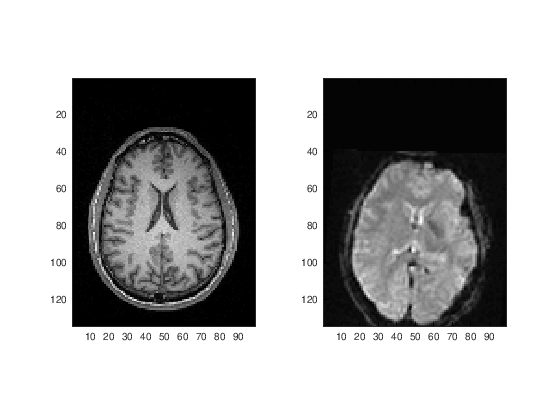

In [5]:
A = spm_slice_vol(spm_vol(ref),spm_matrix([0 0 70]),[99 134],1);
F = spm_slice_vol(spm_vol(spm_file(src,'prefix','o')),spm_matrix([0 0 70]),[99 134],1);
subplot(1,2,1),imagesc(rot90(A)),axis equal,axis tight
subplot(1,2,2),imagesc(rot90(F)),axis equal, axis tight
colormap gray

In [6]:
%-Coregister
x = spm_coreg(ref, src);


SPM12: spm_coreg (v7320)                           12:26:09 - 13/03/2019
Completed                               :          12:26:25 - 13/03/2019


In [7]:
%-Save transformation in NIfTI header
X  = spm_matrix(x);
M = spm_get_space(src);
spm_get_space(src, X\M);

In [8]:
%-Reslice
spm_reslice({ref,src}, struct('mean',false,'which',1));


SPM12: spm_reslice (v7141)                         12:26:25 - 13/03/2019
Completed                               :          12:26:26 - 13/03/2019


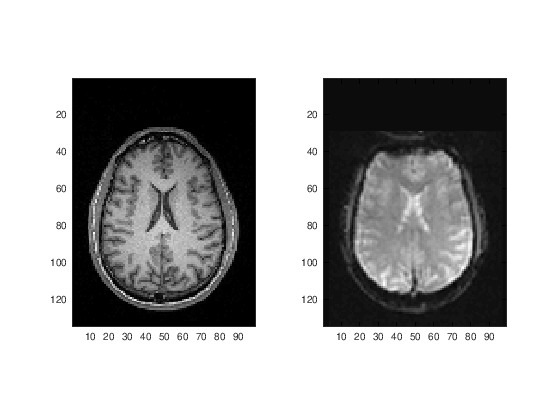

In [9]:
A = spm_slice_vol(spm_vol(ref),spm_matrix([0 0 70]),[99 134],1);
F = spm_slice_vol(spm_vol(spm_file(src,'prefix','r')),spm_matrix([0 0 70]),[99 134],1);
subplot(1,2,1),imagesc(rot90(A)),axis equal,axis tight
subplot(1,2,2),imagesc(rot90(F)),axis equal, axis tight
colormap gray